In [29]:
import numpy as np
import math
import scipy
import scipy.linalg  
import time
import scipy.sparse as sparse
import scipy.sparse.linalg
import matplotlib.pyplot as plt


In [30]:
Nvm = 10
nvm=10

In [31]:
def element_locator(Nvm, nvm, x, y):
    intx = x*Nvm
    inty = y*nvm
    if intx ==0:
        colnum = 1
    elif intx==int(intx):
        colnum =int(x*Nvm)
    else:
        colnum = int(x*Nvm)+1
    print(colnum)
    
    if inty ==0:
        rownum =1
    elif inty==int(inty):
        rownum = int(y*nvm)
    else:
        rownum = int(y*nvm)+1
    print(rownum)
    i = colnum-1+(rownum-1)*Nvm
    
    return i

In [32]:
def DeepDDM(Nvm,nvm, h_x, h_y, ):
    #Nvm = number of sub divisions on x  axis
    #nvm = number of subdivisions on y axis
    #Nvm*nvm= number of subdomains
    #h is amount of overlap in the relevant axis
        #note h_x<=1/Nvm, h_y<=1/nvm
    #Space is [0,1] by [0,1]
    
    #connnectivity matrix, as in what subdomains are connected
    #is boundary matrix
    #range of the various subdomains
    
    len_x = 1/Nvm # length of the subdivisions on x axis
    len_y = 1/nvm #length of the subdivisions on y axis
    
    DomNum = Nvm*nvm
    sub_x_min = np.empty(DomNum) 
    sub_x_max = np.empty(DomNum)
    sub_y_min = np.empty(DomNum)
    sub_y_max = np.empty(DomNum)
    el_rownum = np.empty(DomNum)
    el_colnum = np.empty(DomNum)
    for i in range(DomNum):
        el_rownum[i] = int(i/Nvm) 
        el_colnum[i] = np.mod(i,Nvm)
        if el_colnum[i] == 0:
            sub_x_max[i] = (el_colnum[i]+1)*len_x+h_x
            sub_x_min[i] = (el_colnum[i])*len_x
        if el_colnum[i] == Nvm-1:
            sub_x_min[i] = (el_colnum[i])*len_x-h_x
            sub_x_max[i] = (el_colnum[i]+1)*len_x
        if el_colnum[i]!=0 and el_colnum[i]!=Nvm-1:
            sub_x_min[i] = el_colnum[i]*len_x-h_x
            sub_x_max[i] = (el_colnum[i]+1)*len_x+h_x
            
        if el_rownum[i]==0:
            sub_y_max[i] = (el_rownum[i]+1)*len_y+h_y
            sub_y_min[i] = el_rownum[i]*len_y
        if el_rownum[i]==nvm-1:
            sub_y_min[i] = el_rownum[i]*len_y-h_y
            sub_y_max[i] = (el_rownum[i]+1)*len_y
        if el_rownum[i]!=0 and el_rownum[i]!=nvm-1:
            sub_y_min[i] = el_rownum[i]*len_y-h_y
            sub_y_max[i] = (el_rownum[i]+1)*len_y+h_y
    plt.figure()
    for i in range(DomNum):
        plt.vlines(x=[sub_x_min[i], sub_x_max[i]], ymin=0, ymax=1)
        plt.hlines(y=[sub_y_min[i], sub_y_max[i]], xmin=0, xmax=1)
    plt.show()
    
    
        
        
            
            
    

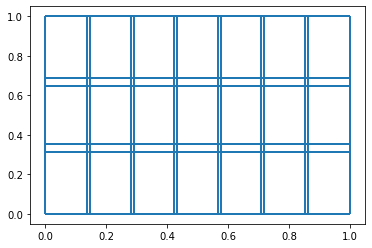

In [33]:
DeepDDM(7,3, 0.005, 0.02)